# Model evaluation tutorial

Another way to use **galpynostatic** is is to perform a evaluation when the fundamentals parameters have already been determined by other techniques (experimentals or from simulations).

First of all, we import the libraries that we will use throughout this example

In [1]:
import galpynostatic
import matplotlib.pyplot as plt
import numpy as np

## Generate the object

Suppose we have a 15 $\mu$m (0.0015 cm) spherical single-particle whose diffusion coefficient and kinetic constant were experimentally determined and have the values of 1.93e-10$cm^2/s$ and 3.14e-7$cm/s$, respectively. Then, we can evaluate these data on the map and see in which region it falls off.

In [2]:
d = 0.0015
dcoeff = 1.93e-10
k0 = 3.14e-7

We load the surface data for spherical geometry with a $150 mV$ cut-off potential and define the $z$-value which is a number that depends on the geometry, here is 3

In [3]:
dataset = galpynostatic.datasets.load_spherical()
z = 3

Now we have all the information to describe the system in the model

In [4]:
greg = galpynostatic.model.GalvanostaticRegressor(dataset, d, z)

Instead of having the galvanostatic profiles at different C-rate values (to fit our heuristic model), we already have the system characterized and we can set those parameters instead of fit them:

In [5]:
greg.dcoeff_ = dcoeff
greg.k0_ = k0

## Visualization

We can then evaluate the model for a C-rate of 4C (15 minutes) and see what maximum SOC it maintains.

In [6]:
fifteen_minutes = np.array([[4]])

greg.predict(fifteen_minutes)

array([0.14295531])

We see that in this hypothetical case it only maintains 14% of the SOC, which is too far from the 80% criterion of USABC, we can visualize this on the map

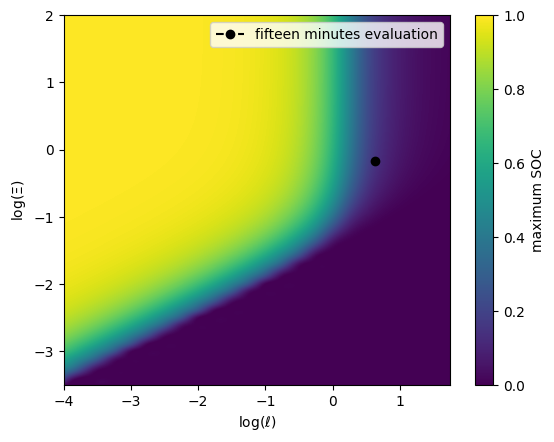

In [7]:
greg.plot.in_surface(fifteen_minutes, label="fifteen minutes evaluation")
plt.legend()
plt.show()

## Particle size prediction

We can make the same prediction as in the previous tutorial about the optimal particle size to reach this SOC.

In [8]:
d_new = galpynostatic.make_prediction.optimal_particle_size(greg, cm_to=1)
d_new

0.0005077513284735257

This value is in $cm$ and can be compared with the original one ($d$)

In [9]:
d_new / d

0.33850088564901715

We see that it is only ~34% of the original radius.

Finally, it can be seen that if we modify the model to have this new particle size, effectively the SOC achieved is 80%.

In [10]:
greg.d = d_new
greg.predict(fifteen_minutes)

array([0.8])